In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
from datetime import date, timedelta
import calendar

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from itables import show
pd.options.display.max_rows = 31

engine = create_engine("sqlite:///c:\\ruby\\expense\\db\\development.sqlite3")
conn = engine.connect()

In [2]:
sql = "SELECT C.name AS item, G.name AS kind FROM categories C \
       JOIN groups G ON group_id = G.id"
df_c = pd.read_sql(sql, conn)
df_c.head()

,item,kind
0,Books & Software,Edutainment
1,CCF,Luxury
2,Cigarette,Luxury
3,Food,Food
4,Fuel,Transportation


In [3]:
month = date(2022, 6, 1)
bom = month
eom = month.replace(day=calendar.monthrange(month.year, month.month)[1])
bom, eom

(datetime.date(2022, 6, 1), datetime.date(2022, 6, 30))

In [4]:
bom
eom

datetime.date(2022, 6, 1)

datetime.date(2022, 6, 30)

In [8]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % eom
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-06-30" 
ORDER BY amount DESC



In [9]:
df = pd.read_sql(sql, conn)
df

,date,amount,item,kind
0,2022-06-30,10000,Parent,Parent
1,2022-06-30,640,Internet Home,Communication
2,2022-06-30,420,Netflix,Edutainment
3,2022-06-30,340,Packt,Edutainment
4,2022-06-30,320,Telephone Dtac,Communication
5,2022-06-30,170,Google,Edutainment
6,2022-06-30,70,Patreon,Edutainment


In [10]:
df.amount.sum()

11960

In [11]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-06-30" 
ORDER BY amount DESC



In [12]:
df_eom = pd.read_sql(sql, conn)
df_eom

,date,amount,item,kind
0,2022-06-30,10000,Parent,Parent
1,2022-06-30,640,Internet Home,Communication
2,2022-06-30,420,Netflix,Edutainment
3,2022-06-30,340,Packt,Edutainment
4,2022-06-30,320,Telephone Dtac,Communication
5,2022-06-30,170,Google,Edutainment
6,2022-06-30,70,Patreon,Edutainment


In [13]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "%s" AND "%s" 
ORDER BY date
"""
sql = sql % (bom, eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "2022-06-01" AND "2022-06-30" 
ORDER BY date



In [14]:
df_t = pd.read_sql(sql, conn)
df_t.head()

,date,amount,item,kind
0,2022-06-01,480,Pets,Pets
1,2022-06-03,23200,Shelter,Shelter
2,2022-06-03,260,Food,Food
3,2022-06-03,330,Personal Care,Apparel
4,2022-06-08,1900,Food,Food


In [15]:
grouped = df_t.groupby("item")
grouped['amount'].sum()

item
Food               4980
Fuel               1430
Google              170
Internet Home       640
Medicine           6850
Merit Making       8100
Mother             6810
Netflix             420
Packt               340
Parent            10000
Patreon              70
Personal Care       330
Pets               4920
Shelter           23200
Telephone Dtac      320
Transportation      140
Name: amount, dtype: int64

In [16]:
grouped = df_t.groupby("kind")
grouped['amount'].sum()

kind
Apparel             330
Communication       960
Edutainment        1000
Food               4980
Medicine           6850
Others             8100
Parent            16810
Pets               4920
Shelter           23200
Transportation     1570
Name: amount, dtype: int64

In [17]:
expense = grouped.amount.sum()
sum(expense)

68720

<Figure size 864x864 with 0 Axes>

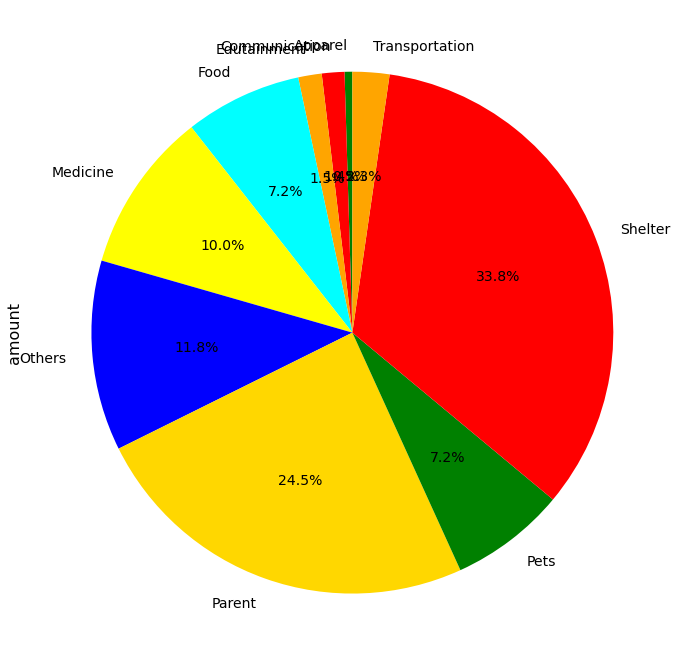

In [18]:
fig_path = "../fig/Expense-2206.png"
with plt.style.context("my_custom_style"):
    plt.figure(figsize=(12, 12))
    ax = expense.plot.pie(
        colors=["green", "red", "orange", "cyan", "yellow", "blue", "gold"],
        startangle=90,
        autopct="%1.1f%%",
    )
    plt.savefig(fig_path)

In [19]:
expense.to_csv("../data/expense-2206.csv")

In [20]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY date
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-06-30" 
ORDER BY date



In [21]:
df_tmp = pd.read_sql(sql, conn)
show(df_tmp[['date','amount','item','kind']])

<IPython.core.display.Javascript object>

date,amount,item,kind


In [22]:
df_tmp.to_csv("../data/expense-eom.csv")